https://medium.com/ibm-data-science-experience/missing-data-conundrum-exploration-and-imputation-techniques-9f40abe0fd87

In [3]:
#exploring data misingness
import numpy as np
import pandas as pd
import matplotlib
!pip install missingno
%matplotlib inline

Exception:
Traceback (most recent call last):
  File "c:\users\willi10l\appdata\local\continuum\anaconda3\lib\site-packages\pip\basecommand.py", line 215, in main
    status = self.run(options, args)
  File "c:\users\willi10l\appdata\local\continuum\anaconda3\lib\site-packages\pip\commands\install.py", line 335, in run
    wb.build(autobuilding=True)
  File "c:\users\willi10l\appdata\local\continuum\anaconda3\lib\site-packages\pip\wheel.py", line 749, in build
    self.requirement_set.prepare_files(self.finder)
  File "c:\users\willi10l\appdata\local\continuum\anaconda3\lib\site-packages\pip\req\req_set.py", line 380, in prepare_files
    ignore_dependencies=self.ignore_dependencies))
  File "c:\users\willi10l\appdata\local\continuum\anaconda3\lib\site-packages\pip\req\req_set.py", line 666, in _prepare_file
    check_dist_requires_python(dist)
  File "c:\users\willi10l\appdata\local\continuum\anaconda3\lib\site-packages\pip\utils\packaging.py", line 48, in check_dist_requires_python
 

In [4]:
import missingno as msno

In [5]:
train_df = pd.read_csv('C:\\Users\\willi10l\\Downloads\\corsicana_training_reduced.csv', parse_dates=["timestamp"])

In [6]:
train_df.head

<bound method NDFrame.head of                 timestamp  avg_qc_lites  \
0     2015-01-01 06:00:00           NaN   
1     2015-01-01 07:30:00           NaN   
2     2015-01-01 09:00:00           5.0   
3     2015-01-01 10:30:00           4.0   
4     2015-01-01 12:00:00           4.0   
5     2015-01-01 13:30:00           NaN   
6     2015-01-01 15:00:00           3.5   
7     2015-01-01 16:30:00           NaN   
8     2015-01-01 18:00:00           3.0   
9     2015-01-01 19:30:00           NaN   
10    2015-01-01 21:00:00           1.5   
11    2015-01-01 22:30:00           2.5   
12    2015-01-02 00:00:00           2.0   
13    2015-01-02 01:30:00           NaN   
14    2015-01-02 03:00:00           3.0   
15    2015-01-02 04:30:00           0.0   
16    2015-01-02 06:00:00           5.0   
17    2015-01-02 07:30:00           NaN   
18    2015-01-02 09:00:00           5.0   
19    2015-01-02 10:30:00           3.0   
20    2015-01-02 12:00:00           3.0   
21    2015-01-02 13:30:0

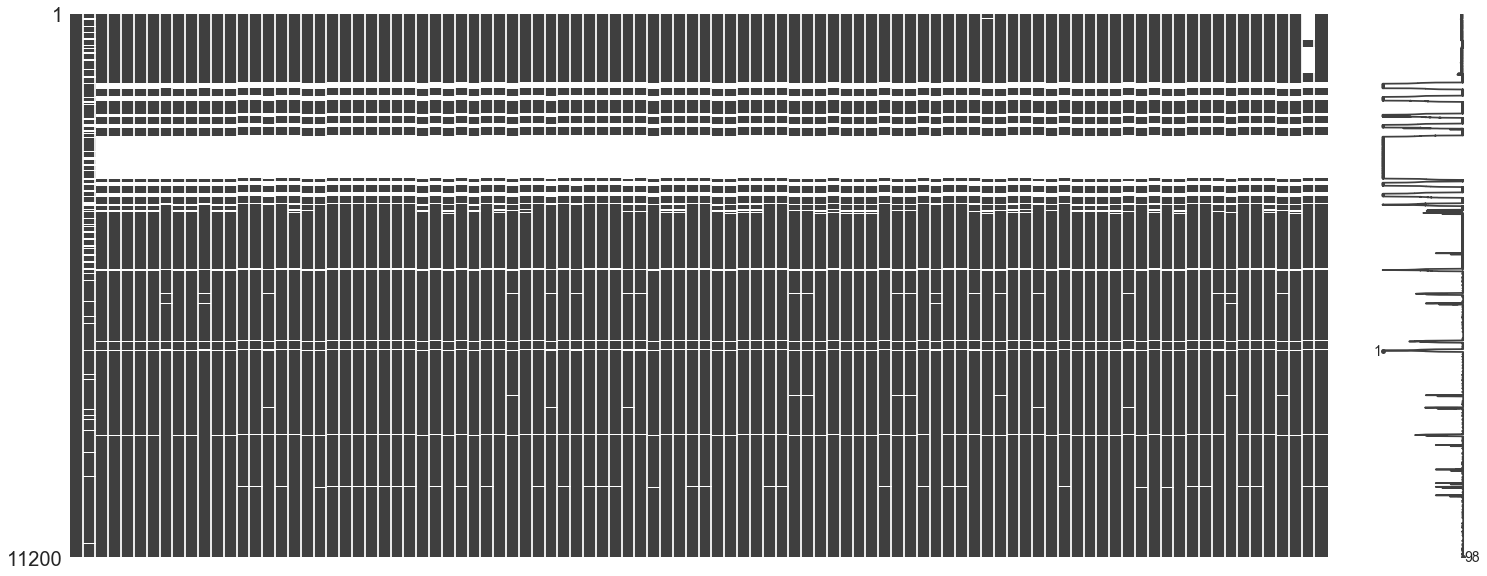

In [4]:
#The nullity matrix gives us a data-dense display which lets us visually pick out the missing data patterns.
#The sparkline on the right, gives us a summary of the general shape of the data completeness and an indicator
#of the rows with maximum and minimum rows.
msno.matrix(train_df)

UnboundLocalError: local variable 'ax2' referenced before assignment

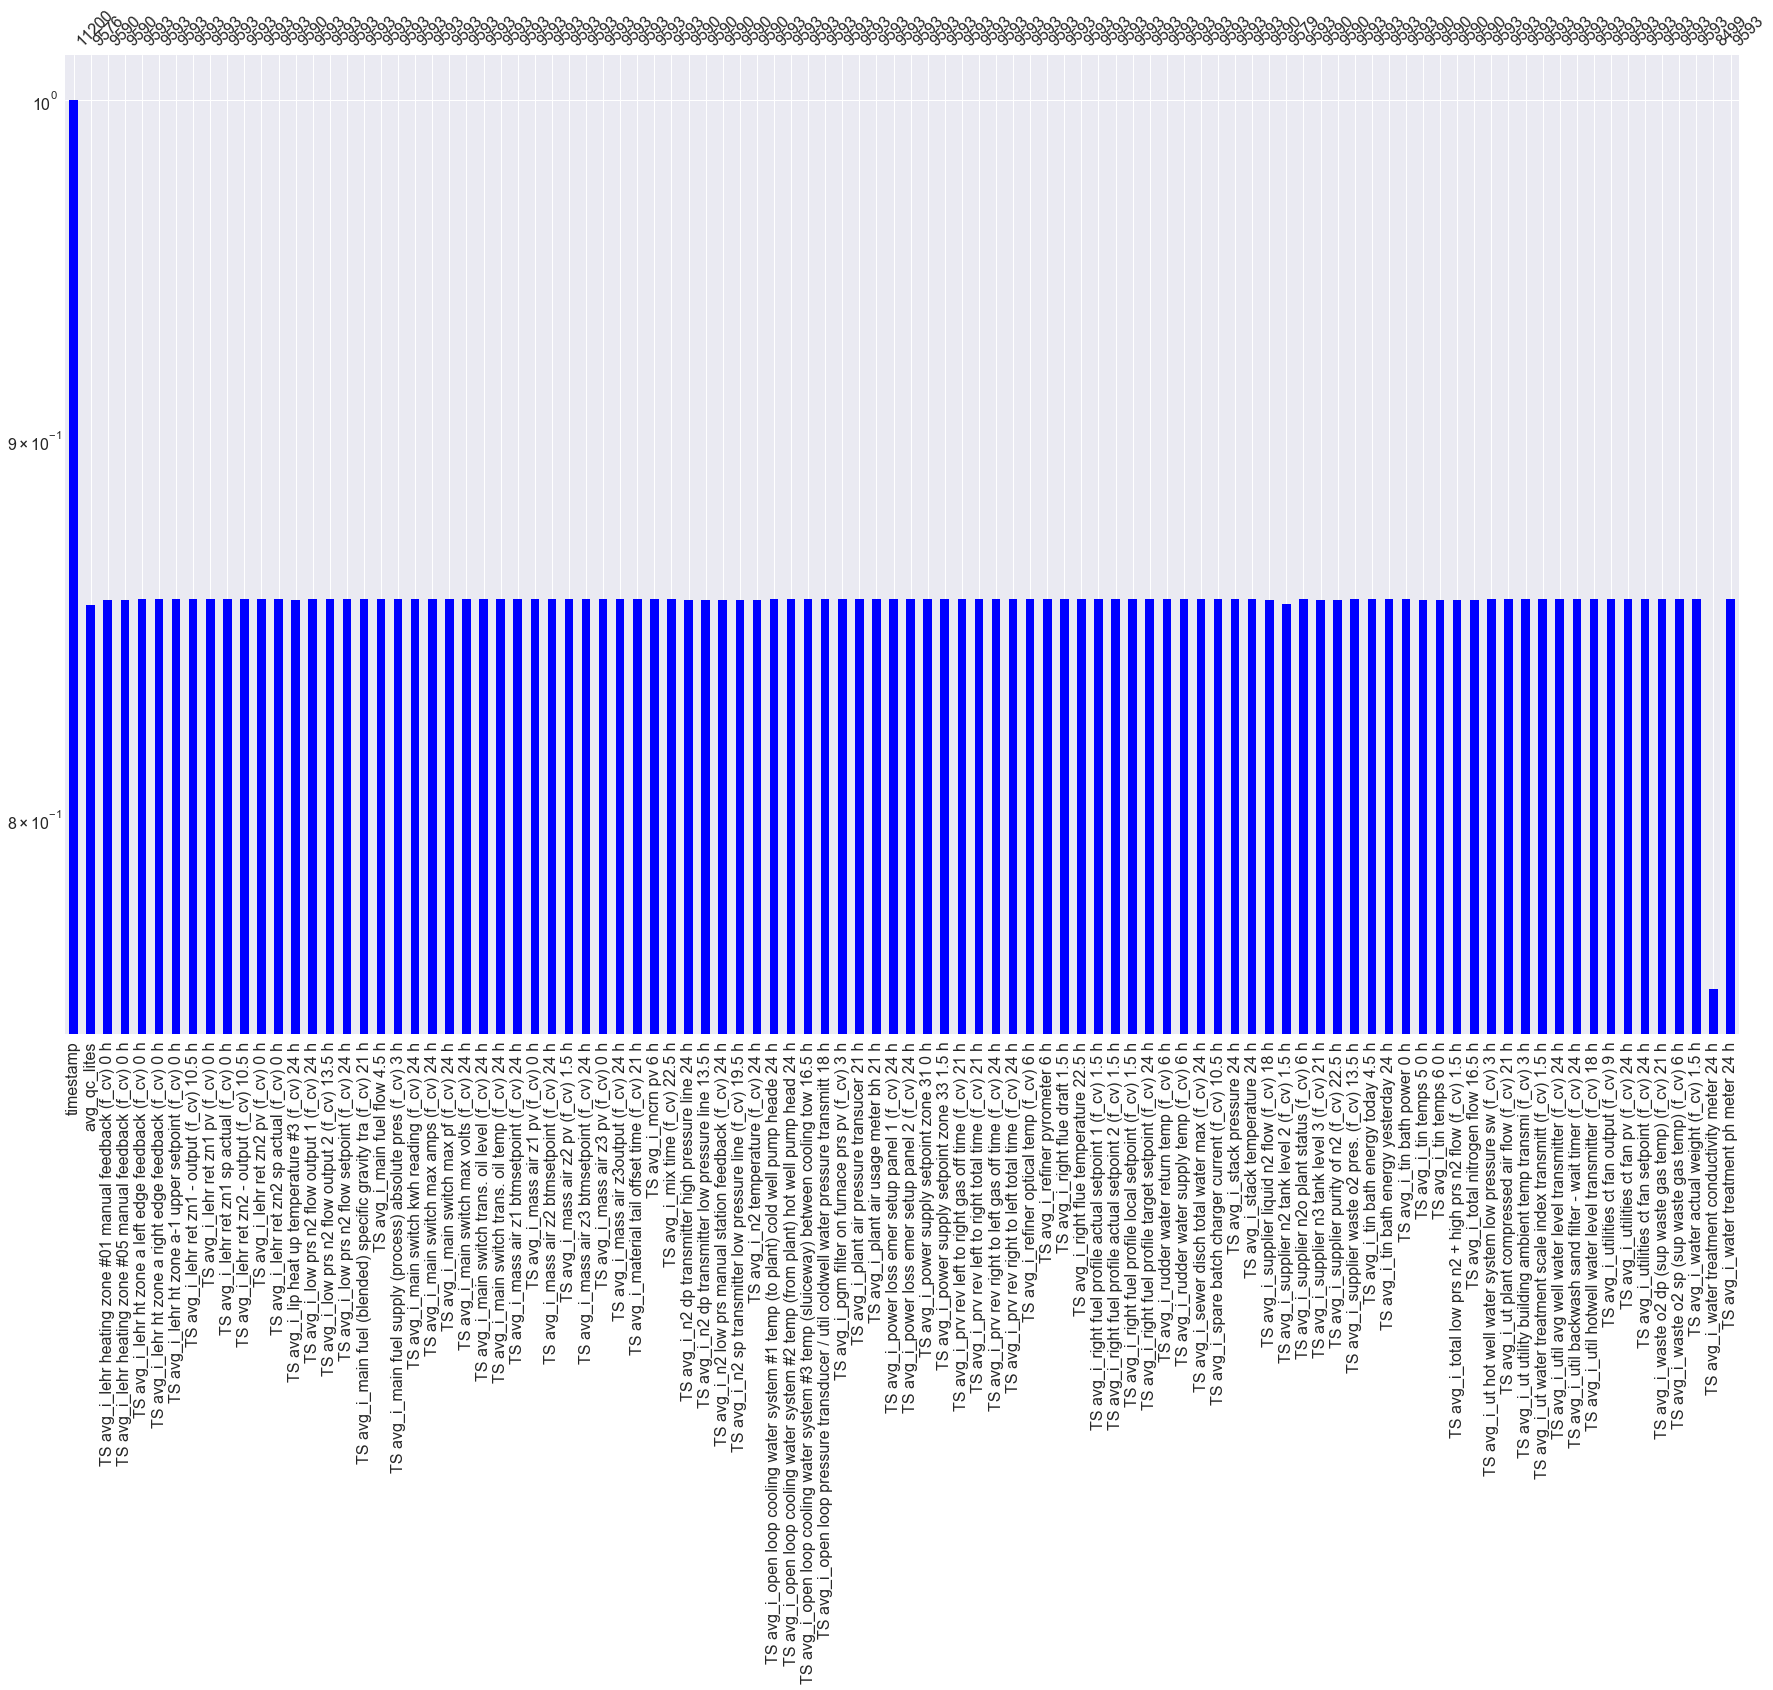

In [5]:
#The missingno bar chart is a visualization of the data nullity. We log transformed the data on the y-axis to better
#visualize features with very large missing values. 
msno.bar(train_df, color="blue", log=True, figsize=(30,18))

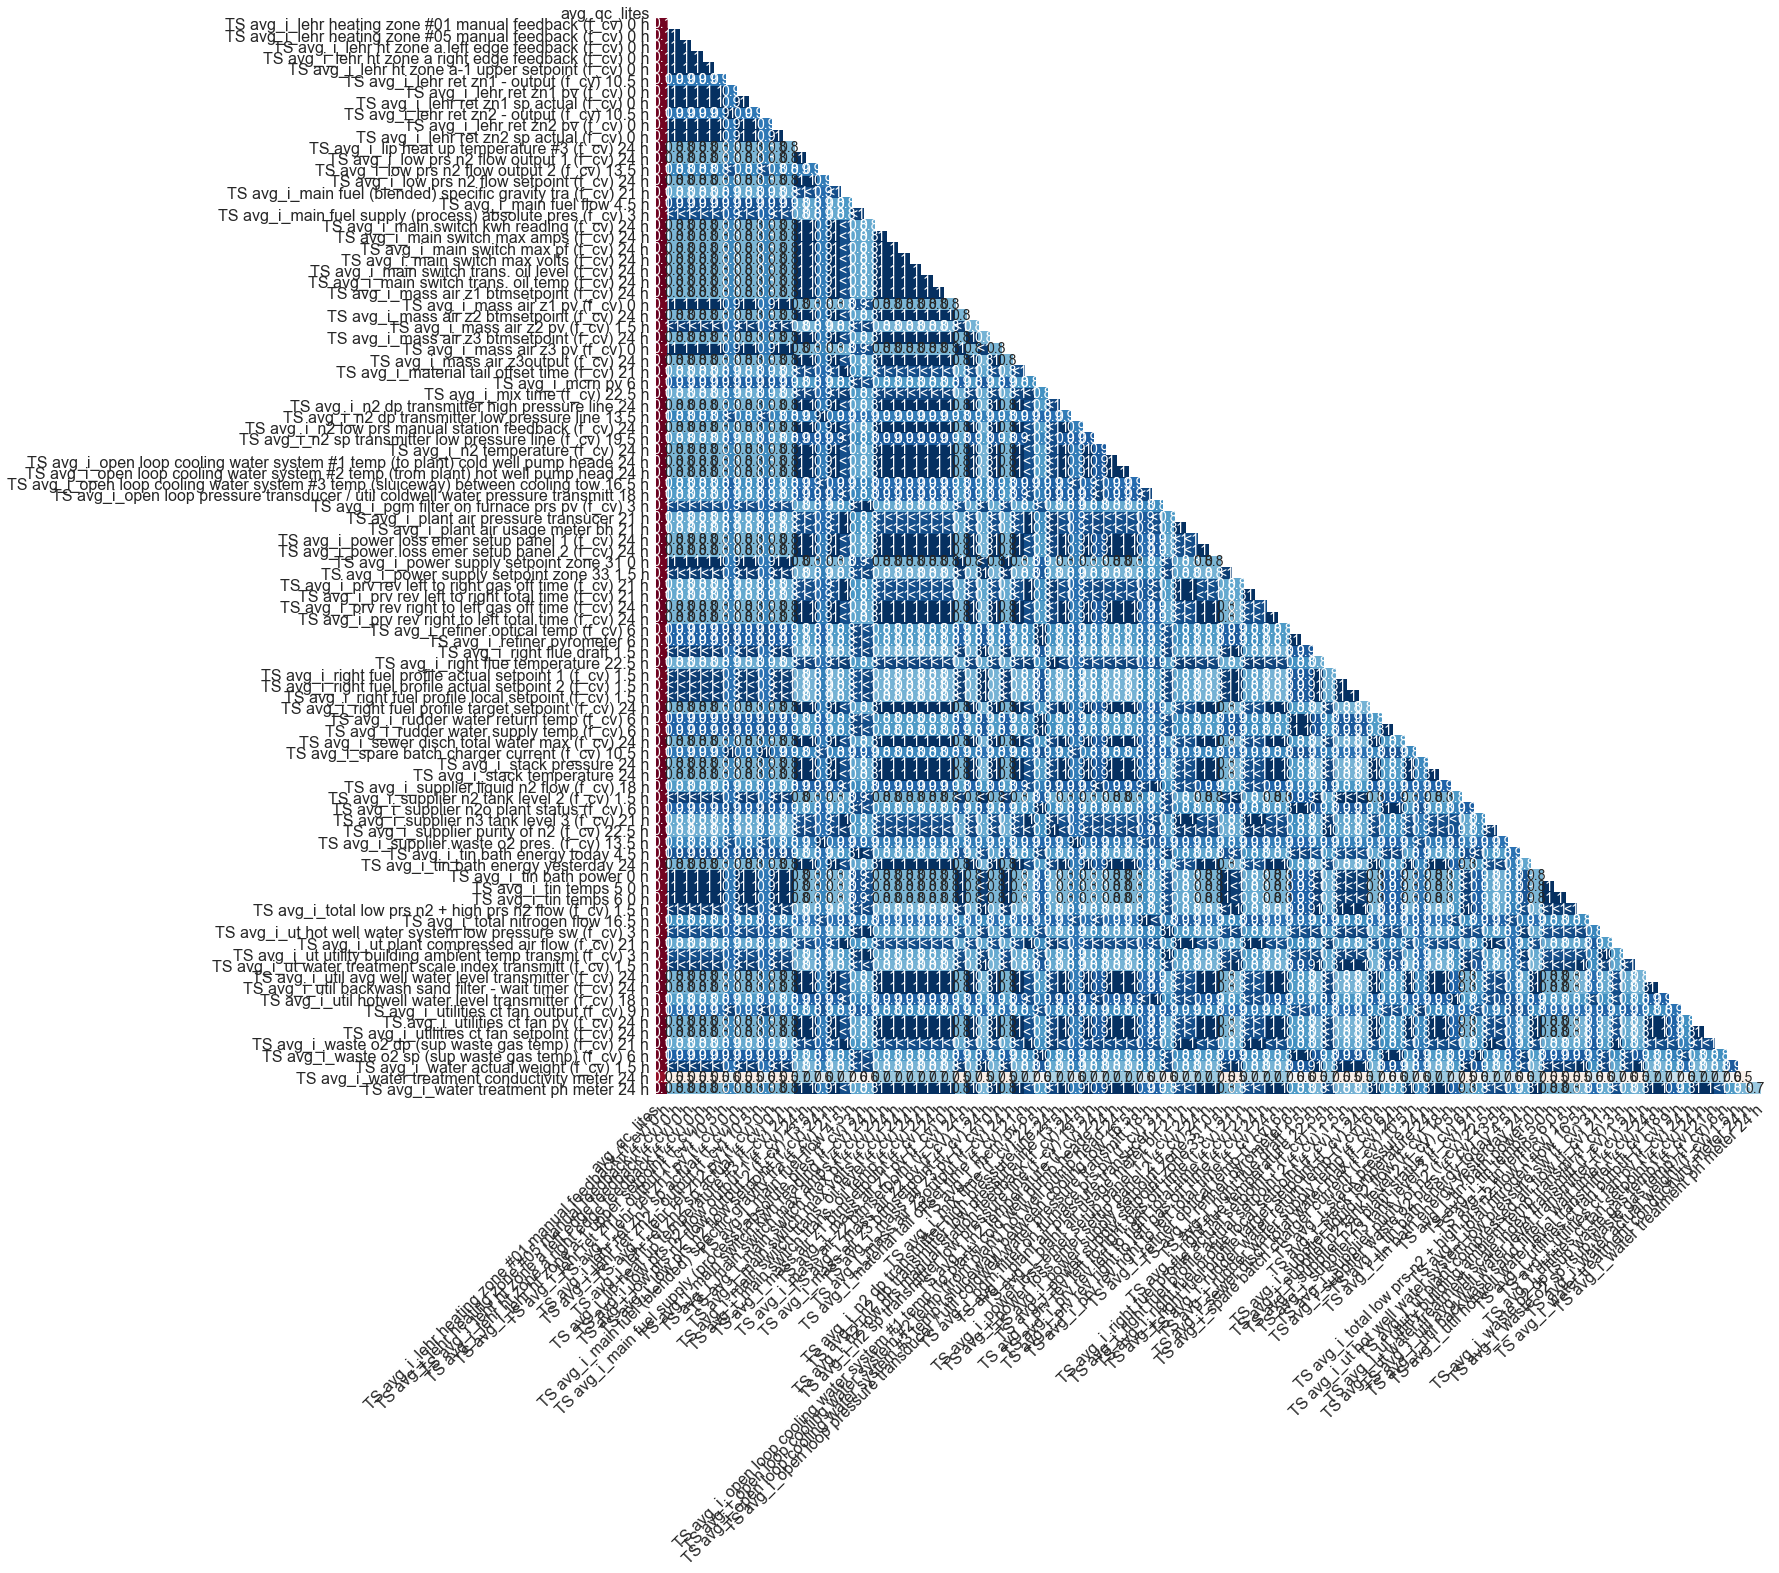

In [6]:
#The heatmap correlation describes the degree of nullity relationship between the different features.
#The range of the nullity correlation is from -1 to 1. Features with no missing values are excluded in the heatmap
#If the nullity correlation is very close to zero (-0.05 to 0.05), no value will be displayed. 
#A perfect positive nullity correlation (1) indicates when the first feature and the second feature both have corresponding
#missing values. A (-1) correlation means that one of the features is missing and the second feature is not missing. 
#if you receive an IOPub data rate exceeded error, open a jupyter console window and enter:
#"jupyter notebook --NotebookApp.iopub_data_rate_limit=1000000000" 
msno.heatmap(train_df, figsize=(20,20))

There are multiple ways to impute missing values. We need to choose carefully as to not introduce bias in the data. Imputation can potentially under and over estimate the variability in the data. 

Case deletion
There are two types of case deletion methods. The first one is known as list deletion (also known as complete case analysis) and the second method is the pair deletion. In both cases, we are completely removing the missing observation from the data. In the pair deletion method, we remove the missing values on an analysis-by-anaysis bases. 

Imputation via sample statistics (mean, median, mode imputation)

k-Nearest Neigbor (kNN Imputation) - can be used to predict both categorical and continious variables. Choosing the correct value for the number of neighbors (k) is an important factor to consider when using kNN imputation


Multiple Imputation by Chained Equations (MICE)- multiple imputation is a process where the missing values are filled multliple times to create "complete" datasets.  MICE works with the assumption that the missing data are Missing at Random (MAR). The MICE algorithm works by running multiple regression models and each missing value is modeled conditionally depending on the observed (non-missing) values.
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3074241/

https://github.com/MizioAnd/HousePrices/blob/master/house_prices.ipynb


Markov Chain Monte Carlo (MCMC) is a technique for generating a sample from a distriburion, and it works even if you don't normalized version of the distribution. So, given a non-normalized posterior from a Babyesiann analysis, we can run MCMC and get a simulated sample from it. which allows us to estimate various things about this posterior distribution. In the Bayesian approach, the missing values can be considered like future observations, and we can calculate a probability for their values by using the posterior predictive distribtuion.
http://sdsawtelle.github.io/blog/output/mcmc-in-python-with-pymc.html
http://nadbordrozd.github.io/blog/2017/03/05/missing-data-imputation-with-bayesian-networks/

xgboost 
http://nadbordrozd.github.io/blog/2017/03/23/missing-data-imputation-with-pymc-part-2/


In [7]:
#MCMC set up
from matplotlib import pyplot as plt
!pip install pymc
import numpy as np
log = np.log
pi = np.pi

  Using cached pymc-2.3.6.tar.gz
  Running setup.py bdist_wheel for pymc: started
  Running setup.py bdist_wheel for pymc: finished with status 'error'
  Complete output from command C:\Users\willi10l\AppData\Local\Continuum\Anaconda3\python.exe -u -c "import setuptools, tokenize;__file__='C:\\Users\\willi10l\\AppData\\Local\\Temp\\pip-build-xiautqt4\\pymc\\setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" bdist_wheel -d C:\Users\willi10l\AppData\Local\Temp\tmp8r61_6gbpip-wheel- --python-tag cp36:
  C:\Users\willi10l\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\distutils\system_info.py:572: UserWarning:
      Atlas (http://math-atlas.sourceforge.net/) libraries not found.
      Directories to search for the libraries can be specified in the
      numpy/distutils/site.cfg file (section [atlas]) or by setting
      the ATLAS environment variable.
    self.calc_info()
  C:\Users\willi10l\

    		  s = logsum(x)
    		Constructing wrapper function "logsum_cpx"...
    		  s = logsum_cpx(x)
    		Creating wrapper for Fortran function "combinationln"("combinationln")...
    		Constructing wrapper function "combinationln"...
    		  combinationln = combinationln(n,k)
    		Constructing wrapper function "expand_triangular"...
    		  t = expand_triangular(d,f)
    		Constructing wrapper function "mod_to_circle"...
    		  mx = mod_to_circle(x,u,l)
    		Constructing wrapper function "standardize"...
    		  z = standardize(x,loc,scale)
    		Creating wrapper for Fortran function "gammln"("gammln")...
    		Constructing wrapper function "gammln"...
    		  gammln = gammln(xx)
    		Creating wrapper for Fortran function "mvgammln"("mvgammln")...
    		Constructing wrapper function "mvgammln"...
    		  mvgammln = mvgammln(x,k)
    		Creating wrapper for Fortran function "factrl"("factrl")...
    		Constructing wrapper function "factrl"...
    		  factrl = factrl(n)
    		Creatin

  Failed building wheel for pymc
Command "C:\Users\willi10l\AppData\Local\Continuum\Anaconda3\python.exe -u -c "import setuptools, tokenize;__file__='C:\\Users\\willi10l\\AppData\\Local\\Temp\\pip-build-xiautqt4\\pymc\\setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" install --record C:\Users\willi10l\AppData\Local\Temp\pip-5d8m1xkx-record\install-record.txt --single-version-externally-managed --compile" failed with error code 1 in C:\Users\willi10l\AppData\Local\Temp\pip-build-xiautqt4\pymc\


In [8]:
x = np.array([ None, 5, 4, 4, None, 3.5, None, 3, None, 1.5, 2.5, 2, None, 3, 0, 5, None, 5, 3, 3, None, 3, 6, 4, None,
              7, 7, 1, None, 7, 12, 6, None, 8, 7, 3, None, 9, 7, 7, 8, None, 7, 5, None, 4, 9, 8, 1, 3, 2, None, 3.5, 
              3, 3, None, 2, 1, 0, None, 4, 5, 3, None, 2, 1, 4, None, 2.5, 1, 4, 2, None, 2, 1, None, 4, 4, 3, None,
              8, 1, 1, None, 4, 2, 2.5, None, 0, 5, None, 4.5, 6, 1])

In [9]:
masked_data = np.ma.masked_equal(x, value=None)

In [12]:
!pip install pymc

  Using cached pymc-2.3.6.tar.gz
  Running setup.py bdist_wheel for pymc: started
  Running setup.py bdist_wheel for pymc: finished with status 'error'
  Complete output from command C:\Users\willi10l\AppData\Local\Continuum\Anaconda3\python.exe -u -c "import setuptools, tokenize;__file__='C:\\Users\\willi10l\\AppData\\Local\\Temp\\pip-build-bj58klrx\\pymc\\setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" bdist_wheel -d C:\Users\willi10l\AppData\Local\Temp\tmp9opu464fpip-wheel- --python-tag cp36:
  C:\Users\willi10l\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\distutils\system_info.py:572: UserWarning:
      Atlas (http://math-atlas.sourceforge.net/) libraries not found.
      Directories to search for the libraries can be specified in the
      numpy/distutils/site.cfg file (section [atlas]) or by setting
      the ATLAS environment variable.
    self.calc_info()
  C:\Users\willi10l\

    			Block: poisson_gmu
    			Block: trpoisson
    			Block: trpoisson_gmu
    			Block: t
    			Block: t_grad_x
    			Block: t_grad_nu
    			Block: chi2_grad_nu
    			Block: nct
    			Block: multinomial
    			Block: weibull
    			Block: weibull_gx
    			Block: weibull_ga
    			Block: weibull_gb
    			Block: logistic
    			Block: normal
    			Block: normal_grad_tau
    			Block: normal_grad_x
    			Block: normal_grad_mu
    			Block: hnormal
    			Block: hnormal_gradx
    			Block: hnormal_gradtau
    			Block: lognormal
    			Block: lognormal_gradx
    			Block: lognormal_gradmu
    			Block: lognormal_gradtau
    			Block: arlognormal
    			Block: gev
    			Block: gev_ppf
    			Block: gamma
    			Block: gamma_grad_x
    			Block: gamma_grad_alpha
    			Block: gamma_grad_beta
    			Block: igamma
    			Block: igamma_grad_x
    			Block: igamma_grad_alpha
    			Block: igamma_grad_beta
    			Block: hyperg
    			Block: geometric
    			Block: geometric_gp
    	

  Failed building wheel for pymc
Command "C:\Users\willi10l\AppData\Local\Continuum\Anaconda3\python.exe -u -c "import setuptools, tokenize;__file__='C:\\Users\\willi10l\\AppData\\Local\\Temp\\pip-build-bj58klrx\\pymc\\setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" install --record C:\Users\willi10l\AppData\Local\Temp\pip-d_j7z16b-record\install-record.txt --single-version-externally-managed --compile" failed with error code 1 in C:\Users\willi10l\AppData\Local\Temp\pip-build-bj58klrx\pymc\


In [14]:
D = pymc.Impute("D", pymc.Poisson, masked_data, mu=r)  # compare to D = pymc.Poisson("D", mu=r, value=disasters_array)

NameError: name 'pm' is not defined

In [ ]:
#KNN
!pip install fancyimpute

In [ ]:
train_df.info()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn

In [ ]:
sn.set(rc={"figure.figsize": (10, 6)});
sn.distplot( train_df.avg_qc_lites )

In [ ]:
from fancyimpute import MICE

In [ ]:
dftrain_filled = pd.DataFrame(kNN(3).complete(train_df))

In [ ]:
#dftrain_filled = pd.DataFrame(KNN(3).complete(train_df))

http://www.awesomestats.in/python-data-preprocessing/